# Figure 3

Panel A: Two alternative choice paradigm  
Panel B: Training Stimuli Generation  
Panel C: Test Stimuli Generation  
Panel D: Hypotheses  

## PANEL A Copy

## PANEL B

In [188]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir, DATA_DIR, FIGURE_DIR
import pandas as pd
import numpy as np
from scipy.io.wavfile import read, write
from starling_rhythm.utils.audio import extract_amp_env
import matplotlib.pyplot as plt

In [48]:
bID = 's_b1555_22'

In [12]:
SAVE_PATH = PROCESSED_DIR / bID / 'salvage_inter_tmf.pickle'

In [6]:
interpolation_stims = pd.read_pickle(SAVE_PATH) ##check

In [7]:
interpolation_stims

,address,test_type,pair_index,interpolation_num,tMF,mean_tMF
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,0,"[96.64821062719706, 104.31630660161872, 85.003...",90.494647
1,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,1,"[83.44079288754041, 77.46060862826131, 69.1893...",83.142759
2,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,2,"[89.63808491932394, 91.6583076084646, 92.73147...",95.858954
3,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,3,"[127.36668055115979, 83.41581656314362, 96.118...",93.250860
4,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,4,"[86.66381519570965, 96.56319131154123, 81.1911...",86.461456
...,...,...,...,...,...,...
251,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,1,123,"[12.114678303181751, 14.336671282831864, 11.12...",11.347009
252,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,1,124,"[13.568945972048208, 12.526242932241095, 13.80...",13.625525
253,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,1,125,"[11.248464810525114, 11.218974303154079, 12.09...",11.443044
254,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,1,126,"[7.883693903014045, 7.227004575242476, 4.03061...",7.166905


In [11]:
SAVE_PATH2 = PROCESSED_DIR / bID / 'stimuli_candidates.pickle'

In [14]:
training_stims = pd.read_pickle(SAVE_PATH2) ##check

In [153]:
trainers = training_stims[(training_stims.pair_index == 1)]

In [154]:
trainers

,index,shuffle_wavs,shuffle_og_seg,shuffle_ts,seg_nb,type,sanity_tmf,SDoTMF,mean_SDoTMF,se_SDoTMF,tmf_dif,tmf_dif_rank,pair_index
30,13886,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-29_10-00-01-02_565720_60383...,6.009748,433,min,7.614779,"[8.361501524561248, 10.62422564016631, 10.2048...",8.363697,1.246702,52.025441,3.0,1
6,13862,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-29_10-00-01-02_565720_60383...,83.369838,433,max,69.515347,"[51.6913887379686, 79.66841249919511, 56.81157...",60.389137,6.602729,52.025441,3.0,1


In [155]:
## Find original 10 sec

In [156]:
from pathlib2 import Path

In [157]:
np.unique(trainers.shuffle_og_seg.values)[0][:61] + '_templatingFalse-empirical_0_.wav'

's_b1555_22_2022-09-29_10-00-01-02_565720_603830_seg_20.0_30.0_templatingFalse-empirical_0_.wav'

In [160]:
og_path = PROCESSED_DIR / 's_b1555_22' / 'segments' / (np.unique(trainers.shuffle_og_seg.values)[0][:61] + '.wav')

## Original

In [161]:
og_sr, og_data = read(og_path)

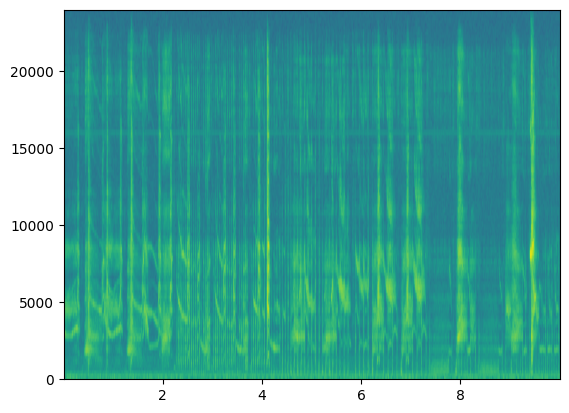

In [162]:
s = plt.specgram(og_data, Fs = og_sr)

## Original with gaps cut out

In [163]:
gap_path = og_path = PROCESSED_DIR / 's_b1555_22' / 'templatingFalse-empirical' / (np.unique(trainers.shuffle_og_seg.values)[0][:61] + '_templatingFalse-empirical_0_.wav')

In [164]:
gap_sr, gap_data = read(gap_path)

/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


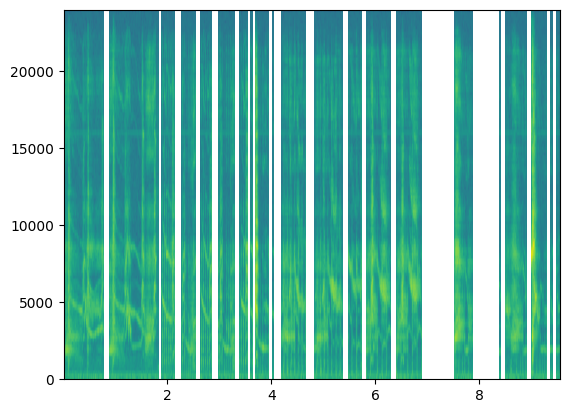

In [165]:
s = plt.specgram(gap_data, Fs = gap_sr)

## Shuffle gap high

In [166]:
trainers

,index,shuffle_wavs,shuffle_og_seg,shuffle_ts,seg_nb,type,sanity_tmf,SDoTMF,mean_SDoTMF,se_SDoTMF,tmf_dif,tmf_dif_rank,pair_index
30,13886,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-29_10-00-01-02_565720_60383...,6.009748,433,min,7.614779,"[8.361501524561248, 10.62422564016631, 10.2048...",8.363697,1.246702,52.025441,3.0,1
6,13862,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-29_10-00-01-02_565720_60383...,83.369838,433,max,69.515347,"[51.6913887379686, 79.66841249919511, 56.81157...",60.389137,6.602729,52.025441,3.0,1


In [192]:
high_path = trainers[trainers.type == 'max'].shuffle_wavs.values[0]

In [193]:
high_sr, high_data = read(high_path)

/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


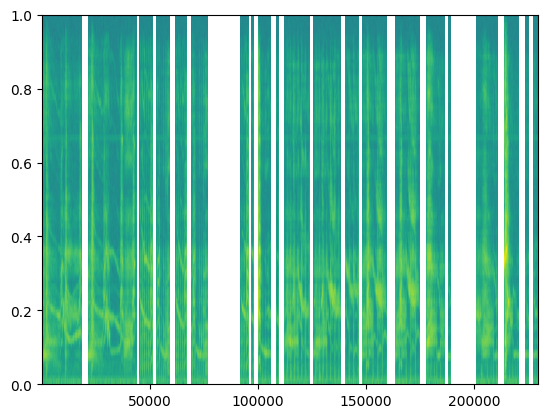

In [194]:
s = plt.specgram(high_data)

## Shuffle low

In [195]:
low_path = trainers[trainers.type == 'min'].shuffle_wavs.values[0]

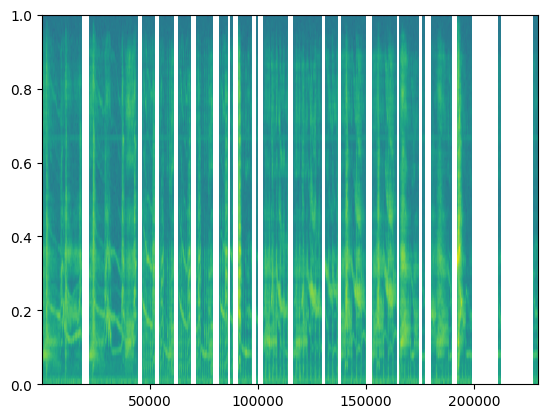

In [196]:
low_sr, low_data = read(low_path)
s = plt.specgram(low_data)

In [172]:
import seaborn as sns

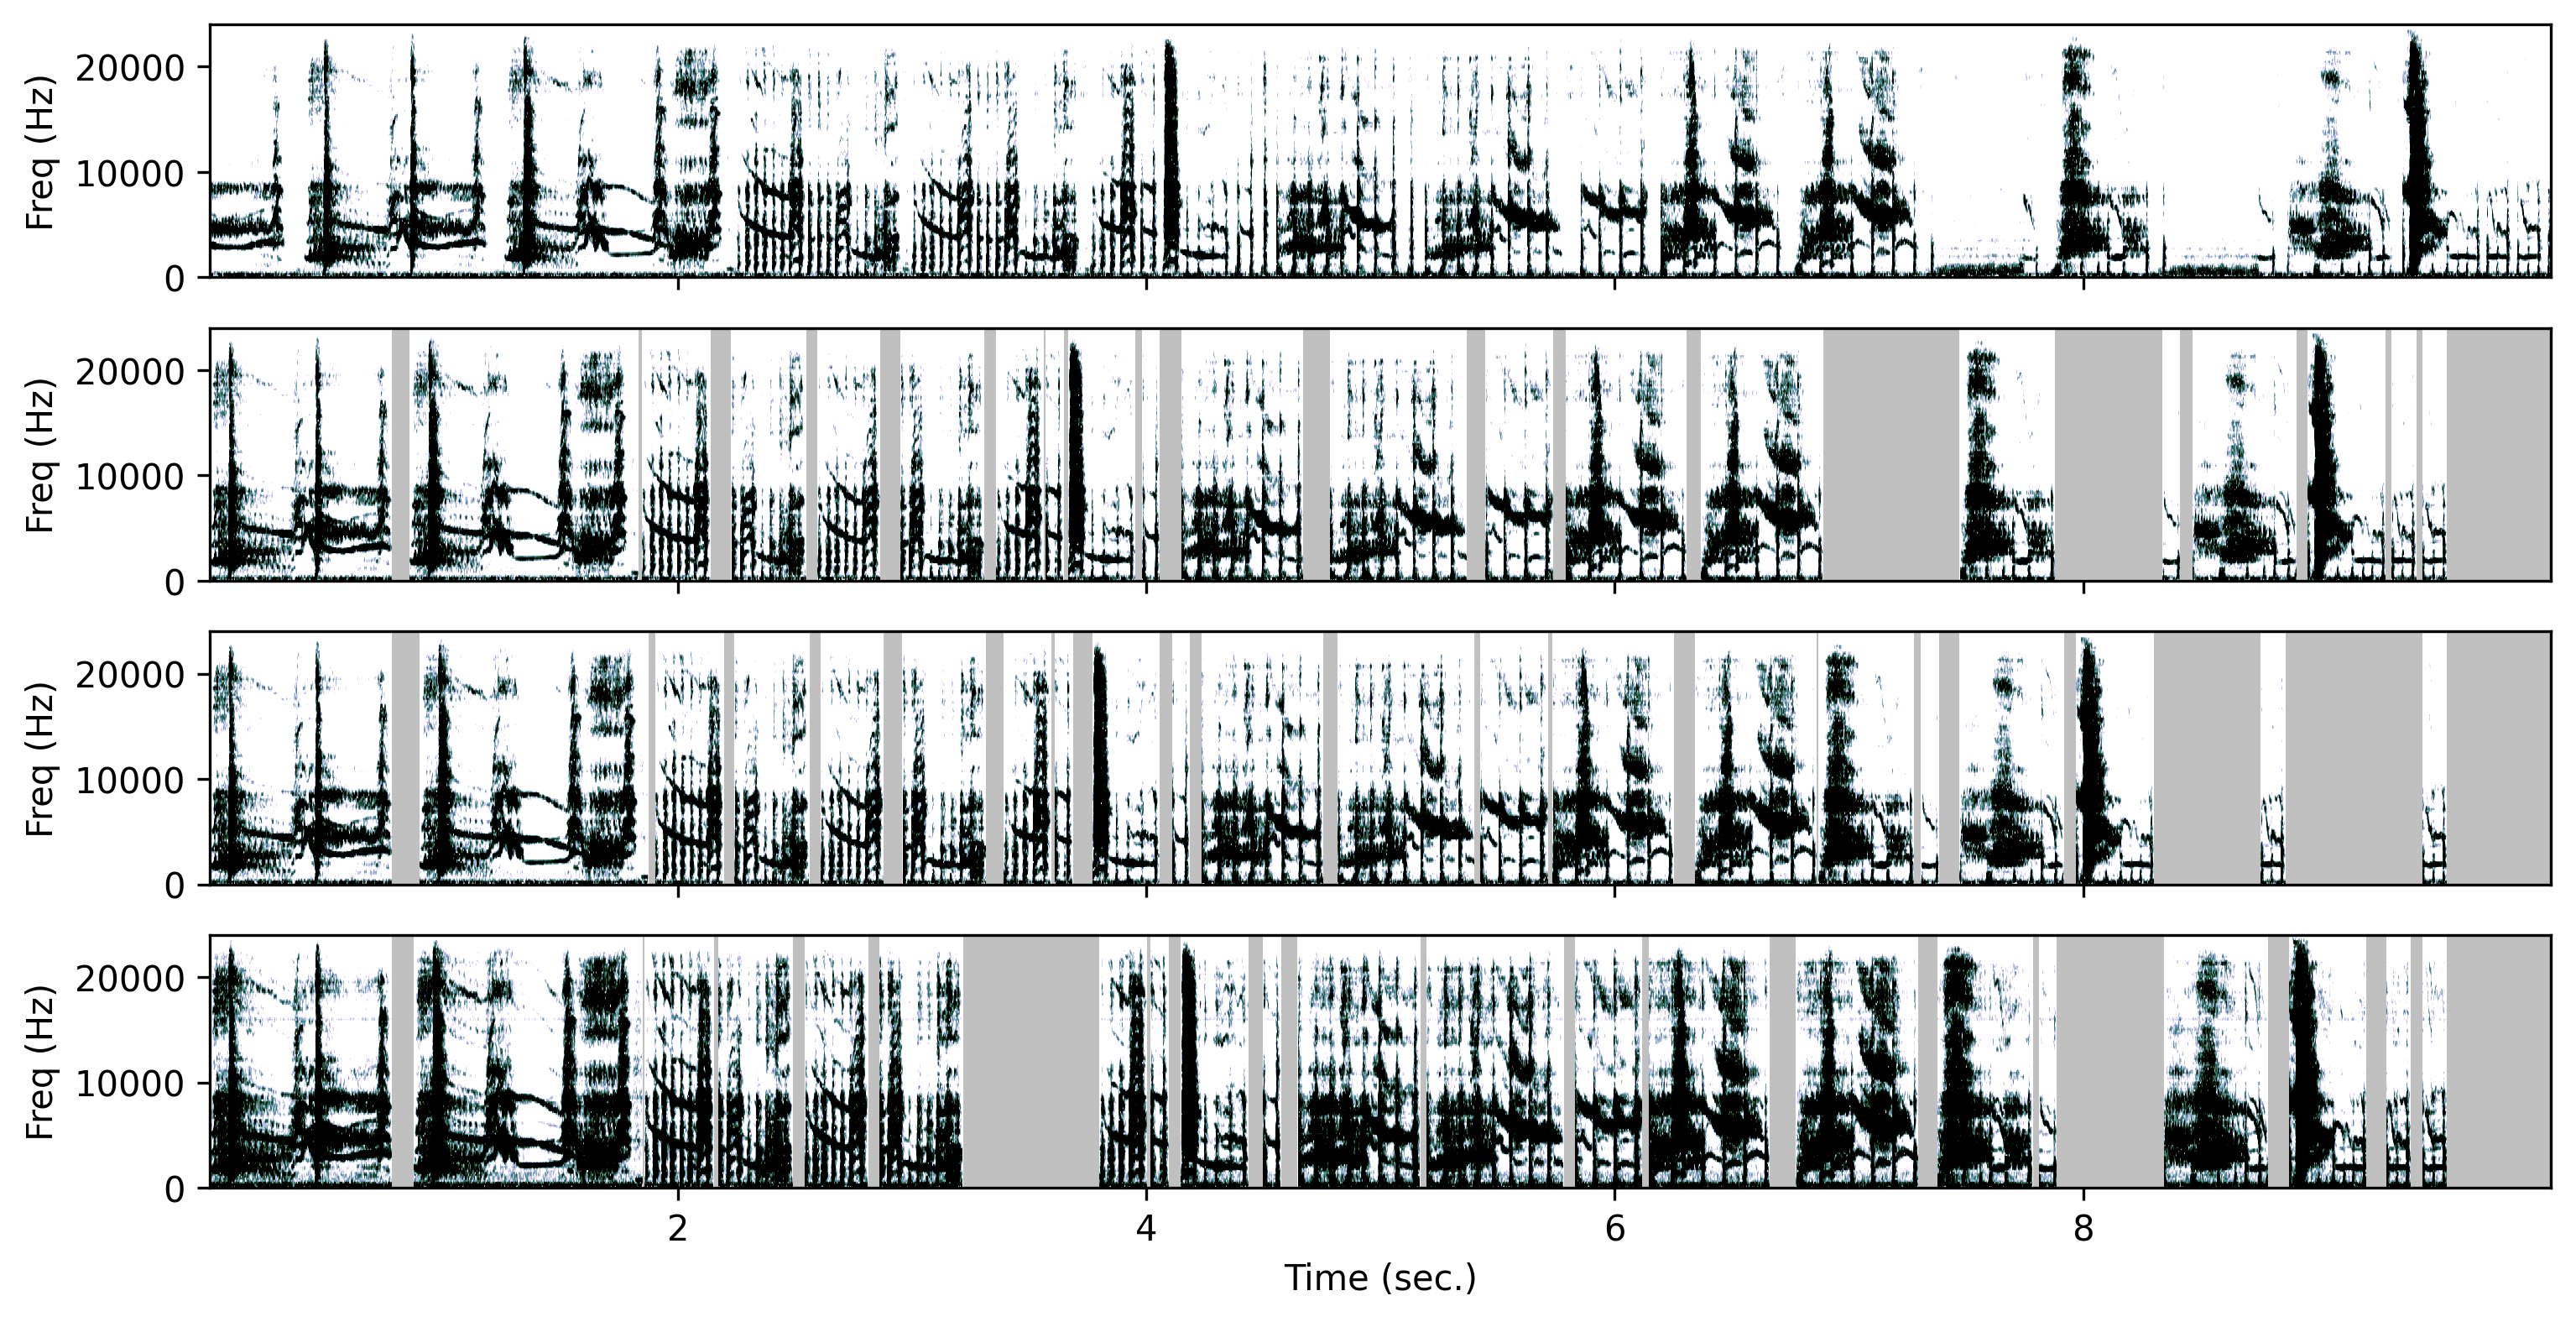

In [189]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (12, 6), dpi = 300, sharex = True)

cmap = sns.cubehelix_palette(start = 1.75, rot = 0.5, dark = -4, light = 7.5, as_cmap=True)

s = axes[0].specgram(og_data, Fs = og_sr, cmap = cmap)
axes[0].set_facecolor("silver")
axes[0].set_ylabel('Freq (Hz)')
#axes[0].set_xlabel('Time (sec.)')
s = axes[1].specgram(gap_data, Fs = og_sr, cmap = cmap)
axes[1].set_facecolor("silver")
axes[1].set_ylabel('Freq (Hz)')
#axes[1].set_xlabel('Time (sec.)')
s = axes[2].specgram(high_data, Fs = og_sr, cmap = cmap)
axes[2].set_facecolor("silver")
axes[2].set_ylabel('Freq (Hz)')
#axes[2].set_xlabel('Time (sec.)')
s = axes[3].specgram(low_data, Fs = og_sr, cmap = cmap)
axes[3].set_facecolor("silver")
axes[3].set_ylabel('Freq (Hz)')
axes[3].set_xlabel('Time (sec.)')

plt.savefig(FIGURE_DIR / 'F3_B_training_stims.pdf', dpi = 'figure', format = 'pdf', transparent = True)